In [1]:
# Import all the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings
import tensorflow as tf
get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option("display.max_rows",None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:
# Reading the dataset

In [3]:
df = pd.read_csv("car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Dimensions of the input data
df.shape

(301, 9)

In [5]:
df.info

<bound method DataFrame.info of                       Car_Name  Year  Selling_Price  Present_Price  \
0                         ritz  2014           3.35          5.590   
1                          sx4  2013           4.75          9.540   
2                         ciaz  2017           7.25          9.850   
3                      wagon r  2011           2.85          4.150   
4                        swift  2014           4.60          6.870   
5                vitara brezza  2018           9.25          9.830   
6                         ciaz  2015           6.75          8.120   
7                      s cross  2015           6.50          8.610   
8                         ciaz  2016           8.75          8.890   
9                         ciaz  2015           7.45          8.920   
10                    alto 800  2017           2.85          3.600   
11                        ciaz  2015           6.85         10.380   
12                        ciaz  2015           7.50       

In [6]:
# Descriptive statistics of each numerical column in the dataset

df.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
# Counting the number of NA or missing values in all columns in the dataframe
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# DATA PROCESSING

In [8]:
# Calculate the usage of number of years for the cars
#relationship between car age and other variables, such as selling price or mileage
df['Usage'] = 2021 - df['Year']
df.drop('Year', axis=1, inplace=True)


In [9]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Usage
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [10]:
# Renaming the columns of Selling price, Present price and Owners to use it in the deep learning model
df.rename(columns = {'Selling_Price':'Selling_Price(l)', 'Present_Price'
                     :'Present_Price(l)', 'Owner':'Past_Owners'}, inplace=True)


In [11]:
df.head()

,Car_Name,Selling_Price(l),Present_Price(l),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Usage
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [12]:
df.columns

Index(['Car_Name', 'Selling_Price(l)', 'Present_Price(l)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Usage'],
      dtype='object')

## visualizing the data

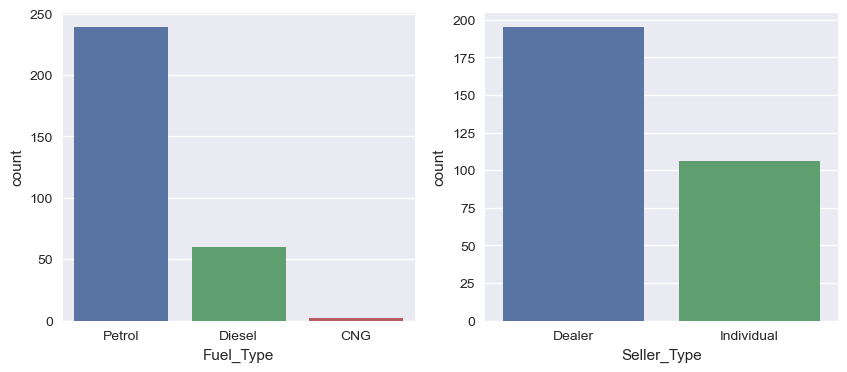

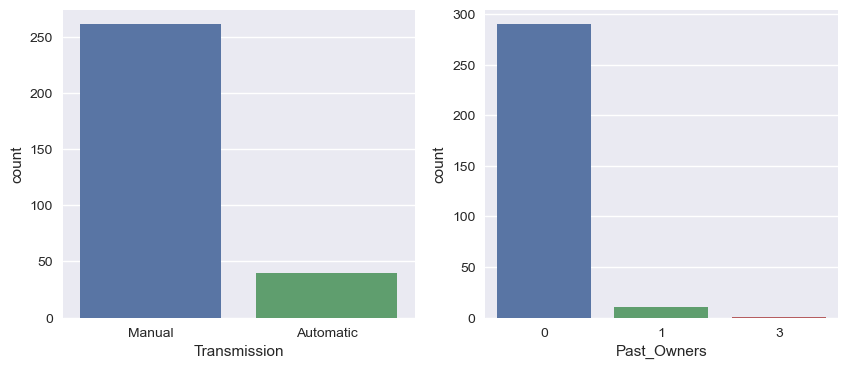

In [13]:
# There are four categorical variables in the dataset
# calculated the frequency of each unique value in these categorical variables 


categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    
    plt.subplot(1,2,1)
    sns.countplot(x=categorical_cols[i], data=df)
    i +=1
    
    plt.subplot(1,2,2)
    sns.countplot(x=categorical_cols[i], data=df)
    i += 1
    
    plt.show()



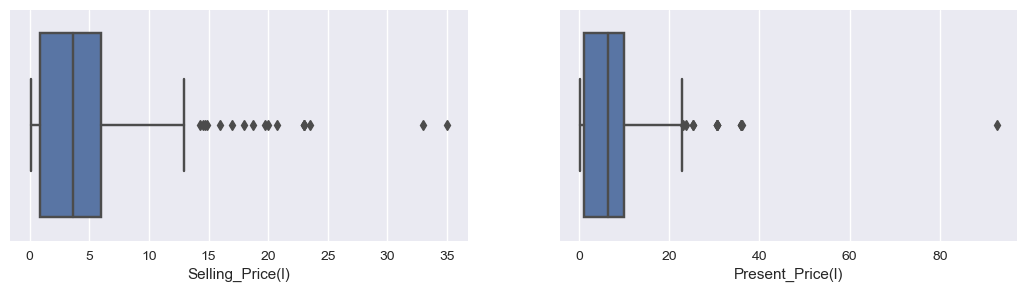

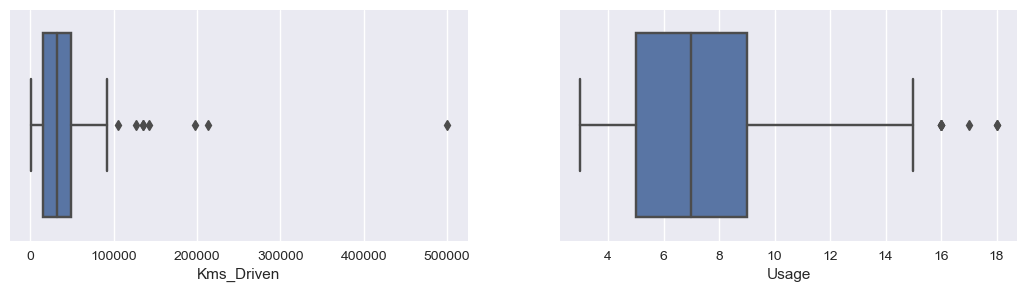

In [14]:
# Plotted boxplots for the numerical columns in the dataset to visualise the range,
#outliers and median values of all those variables

number_cols = ['Selling_Price(l)','Present_Price(l)','Kms_Driven','Usage']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=number_cols[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=number_cols[i], data=df)
    i += 1
    
    plt.show()


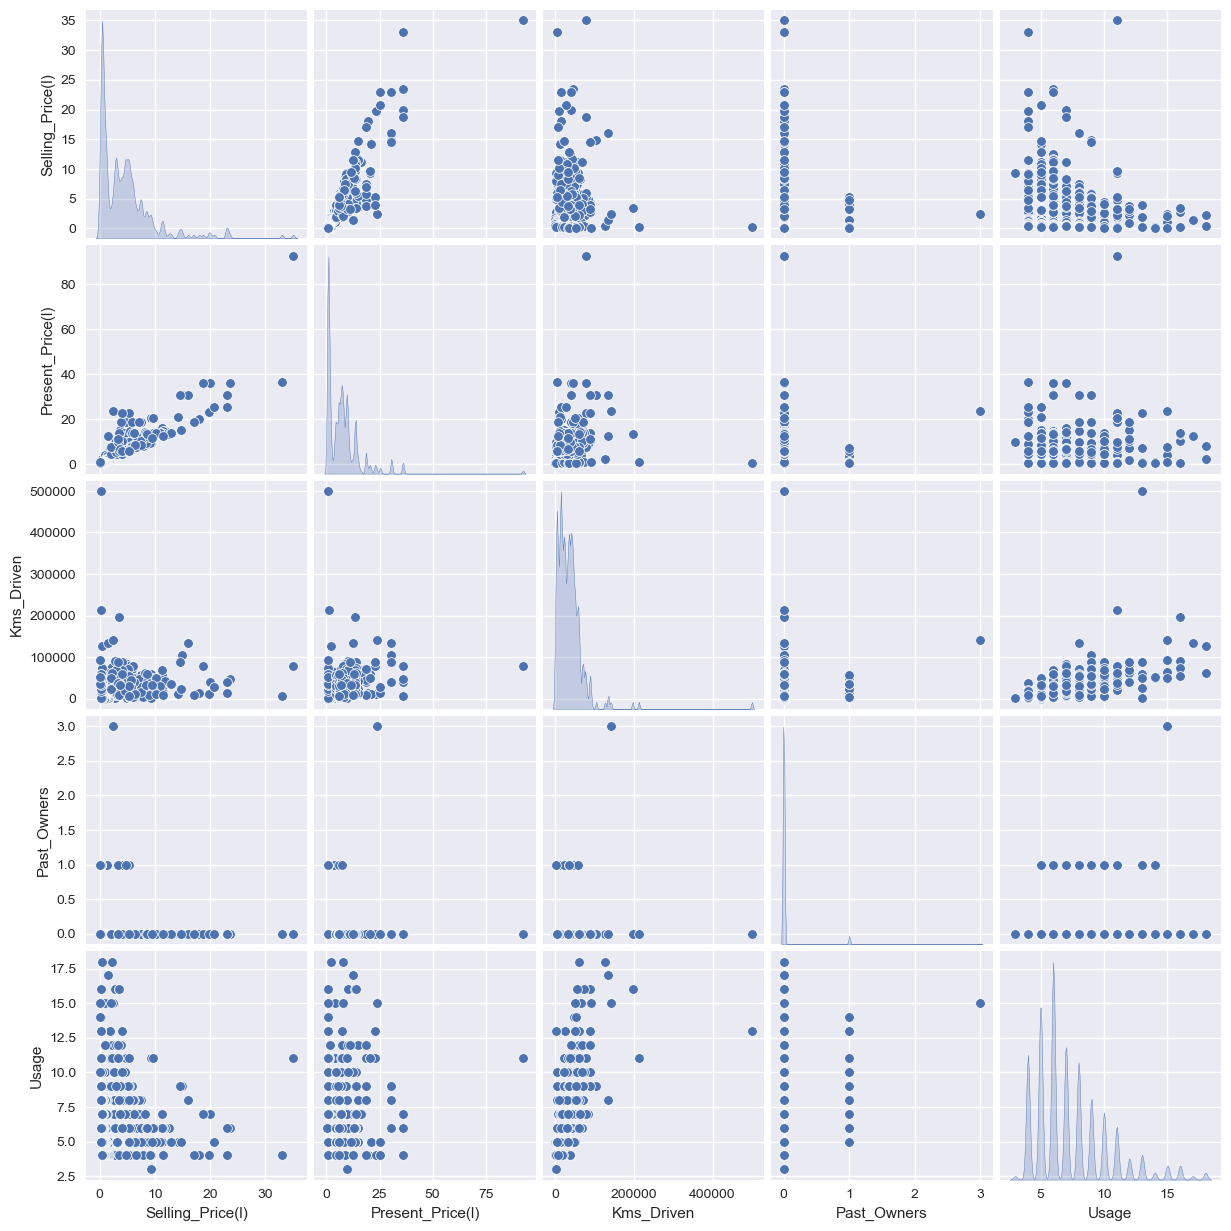

In [15]:
#created pairwise scatterplot,
#The scatter plots can reveal correlations between variables, while the diagonal plots
#can show the distribution of each variable

sns.pairplot(df,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()


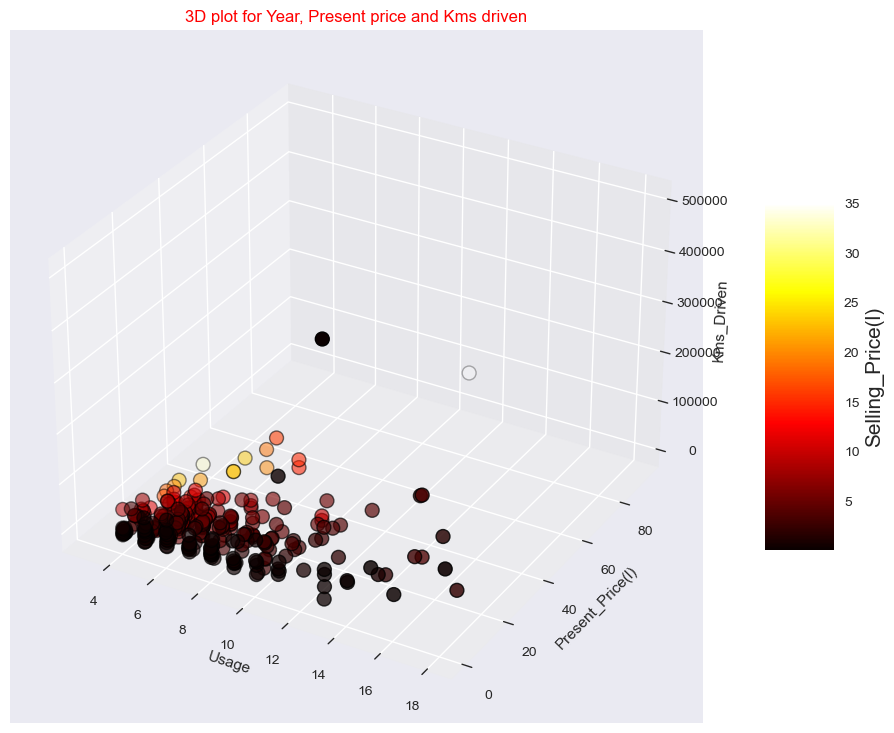

In [16]:
# 3D visualization of the effect of Usage (number of years), Present price, Kms_driven on the Selling price
# The color gradient reflects the value of Selling price (refer the plot legend)
# older car with higher mileage will be less selling  value
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(df["Usage"],
           df["Present_Price(l)"],
           df["Kms_Driven"],
           linewidth=1,edgecolor ="k",
           c=df["Selling_Price(l)"],s=100,cmap="hot")

ax.set_xlabel("Usage")
ax.set_ylabel("Present_Price(l)")
ax.set_zlabel("Kms_Driven")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Selling_Price(l)",fontsize = 15)

plt.title("3D plot for Year, Present price and Kms driven",color="red")
plt.show()



In [17]:
#column has values greater than the 99th percentile of this column, 
#remove outliers or extreme values from the data.
#calculated the quantile vale of present price.
df[df['Present_Price(l)']>df['Present_Price(l)'].quantile(0.99)]

,Car_Name,Selling_Price(l),Present_Price(l),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Usage
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,11


In [18]:
##column has values greater than the 99th percentile of this column,
#remove outliers or extreme values from the data.
# calculated the eaual half value with 99th quantile of selling price
df[df['Selling_Price(l)'] > df['Selling_Price(l)'].quantile(0.99)]

,Car_Name,Selling_Price(l),Present_Price(l),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Usage
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,6
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,11


In [19]:
#column has values greater than the 99th percentile of this column,
# remove outliers or extreme values from the data.
# calculated the eaual half value with 99th quantile of kilometerdriven

df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(l),Present_Price(l),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Usage
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,16
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,11
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,13


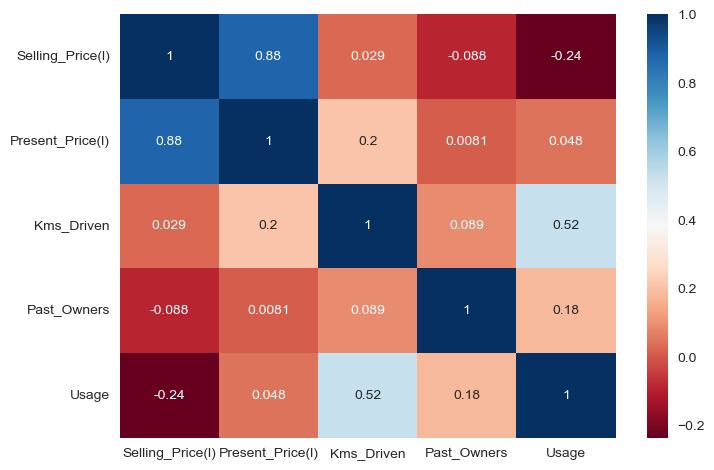

In [20]:
# Heatmap to plot the pairwise correlation coefficients (default Pearson) between numerical columns in the input dataset
# heatmap hep to find the correlation ,which is higly collerated to each other to find a better accuracy
# here i have found the correlation beatween selling price,present price,usage ect...
sns.heatmap(df.corr(), annot = True, cmap='RdBu')
plt.show()



In [21]:
# Calculate the correlation coefficient with respect to Selling price to other columns in the dataset
df.corr()['Selling_Price(l)']

Selling_Price(l)    1.000000
Present_Price(l)    0.878983
Kms_Driven          0.029187
Past_Owners        -0.088344
Usage              -0.236141
Name: Selling_Price(l), dtype: float64

In [22]:
#to compare average seling price of a car with different types of fuel.

df.pivot_table(values='Selling_Price(l)', index = 'Seller_Type', columns='Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [23]:
# drop the column of Car_name from the input dataset
df.drop(labels='Car_Name', axis=1, inplace = True)


In [24]:
df.head()

,Selling_Price(l),Present_Price(l),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Usage
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [25]:
#preprocessing to convert catagorical value into numerical  value.

df = pd.get_dummies(data=df, drop_first=True)

In [26]:
df.head()

,Selling_Price(l),Present_Price(l),Kms_Driven,Past_Owners,Usage,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


## Training,Testing and Spliting the data

In [27]:
# Split the data into two parts : One part contains only Selling_price(y) which is the target data, 
#the other part contains all the other columns in the dataset which is the feature data (x)

X = df.iloc[:,1:].values
y = df.iloc[:,:1].values


In [28]:
print(X)

[[5.5900e+00 2.7000e+04 0.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+00]
 [9.5400e+00 4.3000e+04 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [9.8500e+00 6.9000e+03 0.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+00]
 ...
 [1.1000e+01 8.7934e+04 0.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+00]
 [1.2500e+01 9.0000e+03 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [5.9000e+00 5.4640e+03 0.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+00]]


In [29]:
# Dimensions of the extracted columns of Selling_price and 
print(X.shape, y.shape)

(301, 8) (301, 1)


In [30]:
# The extracted two subsets from above are used to split the data into testing and training data
# 20% of the dataset is used for testing, the rest 80% of the data is used for training the model
# random state is used to set the seed value to use the same random samples every time the model is executed

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)


## Scaling the data

In [31]:
# The testing and training data needs to be standardized to the same mean and standard deviation
# The training dataset is standardised using fit_transform which calculates the mean and standard deviation for each feature 
#in the training data and applies the standardisation formula for each feature
# The testing dataset is normalized using the same mean and standard deviation that are calculated on training dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [32]:
# Dimensions of test and training datasets after standardization
print(X.shape, X_train.shape, X_test.shape)

(301, 8) (240, 8) (61, 8)


In [33]:
print(y.shape, y_train.shape, y_test.shape)

(301, 1) (240, 1) (61, 1)


## Building a model

# Artifical neural network

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## initializing a model


# Adding input layer,hidden layer and output layer.

In [35]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='rmsprop', loss='mse')

In [36]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
8/8 [==============================] - 1s 52ms/step - loss: 51.2597 - val_loss: 43.4309
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 48.5680 - val_loss: 41.1791
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 46.5757 - val_loss: 39.4433
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 44.9268 - val_loss: 37.7540
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 43.3153 - val_loss: 36.1214
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 41.7406 - val_loss: 34.5110
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 40.1045 - val_loss: 32.8705
Epoch 8/100
8/8 [==============================] - 0s 10ms/step - loss: 38.5056 - val_loss: 31.2813
Epoch 9/100
8/8 [==============================] - 0s 10ms/step - loss: 36.8647 - val_loss: 29.5919
Epoch 10/100
8/8 [==============================] - 0s 12ms/step - loss: 35.1560 - val_loss: 28.0448

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [38]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

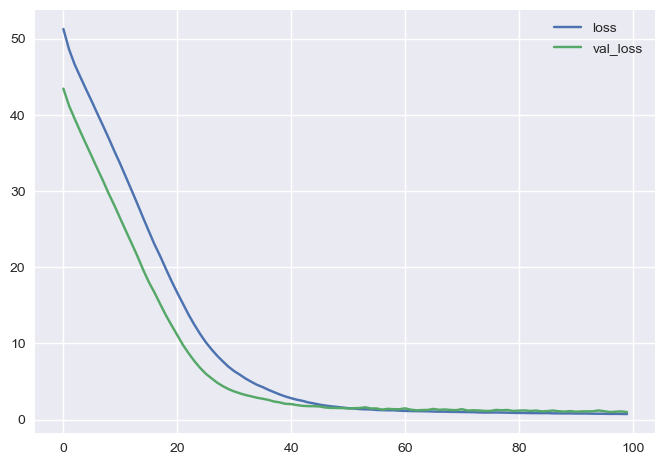

In [39]:
#Printing the loss graph
loss_df.plot()

In [40]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.9984


0.9983763098716736

# prediction/evaluvation


In [41]:
y_pred1 = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [42]:
from sklearn import metrics

# accuracy of a model

In [43]:
score1 = metrics.r2_score(y_test,y_pred1)

In [44]:
print(score1)

0.9539795372496584


In [45]:
# ## model.predict() on y_test

test_pred = model.predict(X_test)



2/2 [==============================] - 0s 4ms/step


In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_test = r2_score(y_test, test_pred)
print("R Squared value of test dataL: ",r2_test)


R Squared value of test dataL:  0.9539795372496584
